In [1]:
#Importing all basic libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Importing and understanding data

In [41]:
# Import .xslx file and convert it to a DataFrame object
#renaming the columns
Clustering_Q1= pd.read_excel("EastWestAirlines.xlsx",sheet_name="data")
Clustering_Q1=Clustering_Q1.rename(columns={'ID#':'ID','Award?':'award'})
Clustering_Q1

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
#information about the data
Clustering_Q1.dtypes ,'/n',Clustering_Q1.columns ,'/n', Clustering_Q1.info

(ID                   int64
 Balance              int64
 Qual_miles           int64
 cc1_miles            int64
 cc2_miles            int64
 cc3_miles            int64
 Bonus_miles          int64
 Bonus_trans          int64
 Flight_miles_12mo    int64
 Flight_trans_12      int64
 Days_since_enroll    int64
 award                int64
 dtype: object,
 '/n',
 Index(['ID', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
        'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
        'Days_since_enroll', 'award'],
       dtype='object'),
 '/n',
 <bound method DataFrame.info of         ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
 0        1    28143           0          1          1          1          174   
 1        2    19244           0          1          1          1          215   
 2        3    41354           0          1          1          1         4123   
 3        4    14776           0          1          1 

# Normalising and Standardising data

In [4]:
#normalising data using Minmax scalar from sklearn.preprocessing

from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
Clustering_Q1_minmax = pd.DataFrame(trans.fit_transform(Clustering_Q1.iloc[:,1:]))
Clustering_Q1_minmax   

,0,1,2,3,4,5,6,7,8,9,10
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [5]:
#another way of normalising data using new function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [6]:
Clustering_Q1_norm= norm_func(Clustering_Q1.iloc[:,1:])
Clustering_Q1_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [7]:
#Standardising the data using StandardScalar from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Clustering_Q1_stdsclr = pd.DataFrame(scaler.fit_transform(Clustering_Q1.iloc[:,1:]))
Clustering_Q1_stdsclr

,0,1,2,3,4,5,6,7,8,9,10
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


# Hierarchial clustering of normalised data and ploting dendrograms

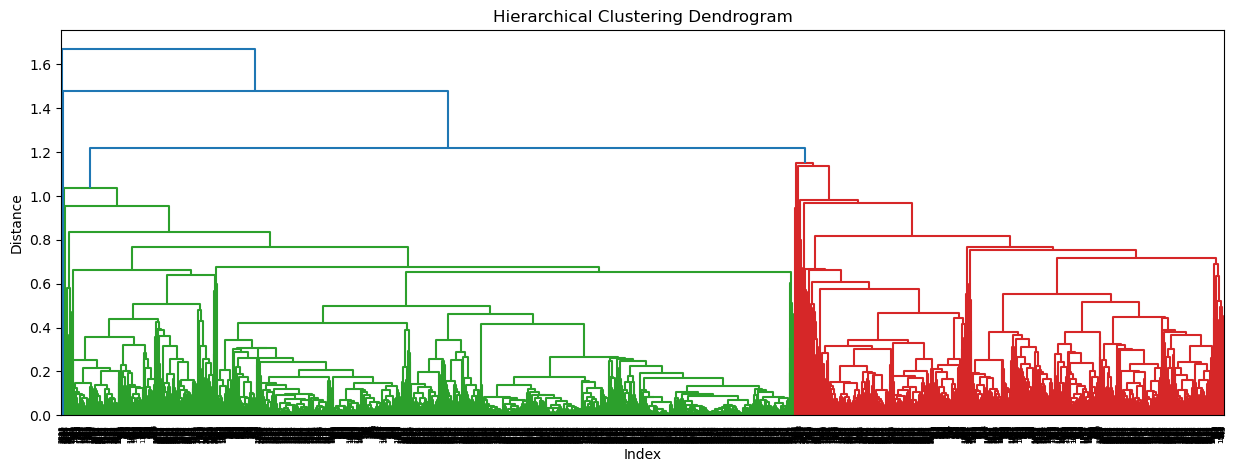

In [8]:
#clustering data using average euclidian distance method by scipy.cluster.hierarchy.linkage
import scipy.cluster.hierarchy as sch # for creating dendrogram 
z =sch. linkage(Clustering_Q1_minmax, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()     

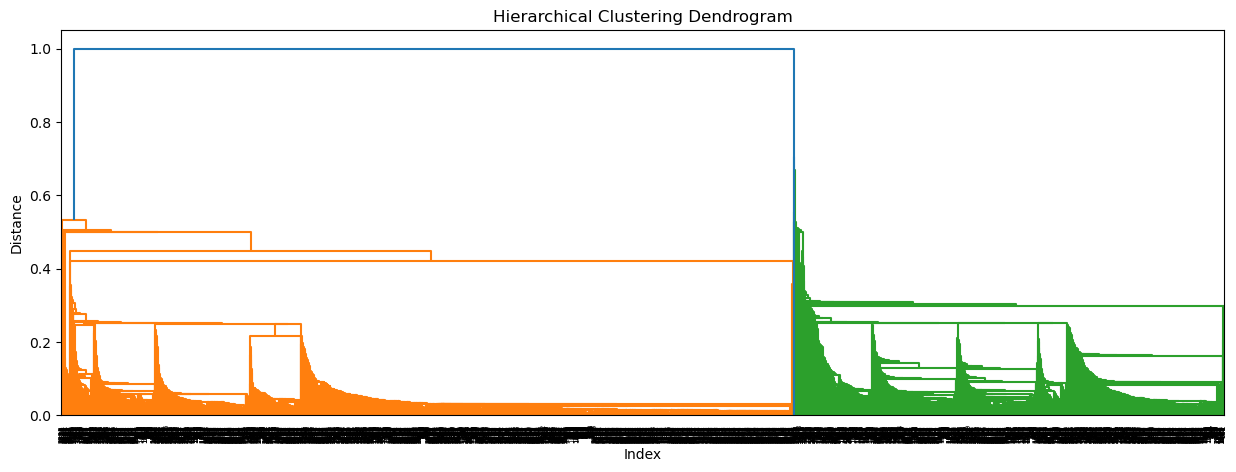

In [9]:
#clustering data using single linkage euclidian distance method by scipy.cluster.hierarchy.linkage
import scipy.cluster.hierarchy as sch # for creating dendrogram 
z =sch. linkage(Clustering_Q1_minmax, method="single",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()          

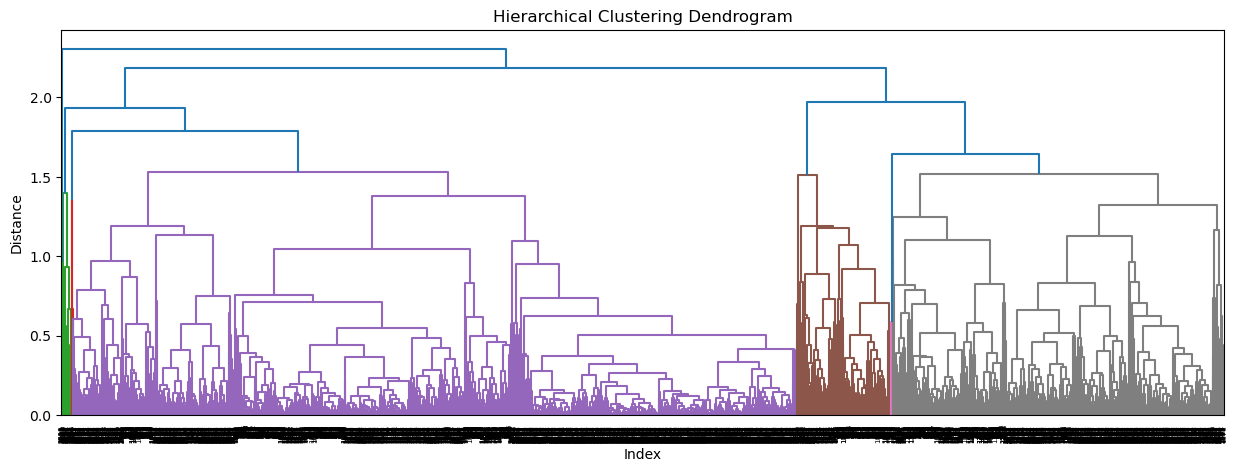

In [10]:
#clustering data using complete linkage euclidian distance method by scipy.cluster.hierarchy.linkage
import scipy.cluster.hierarchy as sch # for creating dendrogram 
z =sch. linkage(Clustering_Q1_minmax, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()       

# creating cluster labels and adding cluster label column to DataFrame

In [11]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=5, linkage='complete',affinity = "euclidean").fit(Clustering_Q1_minmax) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
Clustering_Q1['clust_label']=cluster_labels # creating a  new column and assigning it to new column 
Clustering_Q1_norm_clu=Clustering_Q1
Clustering_Q1_norm_clu

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award,clust_label
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


# exploring clusters

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4')])

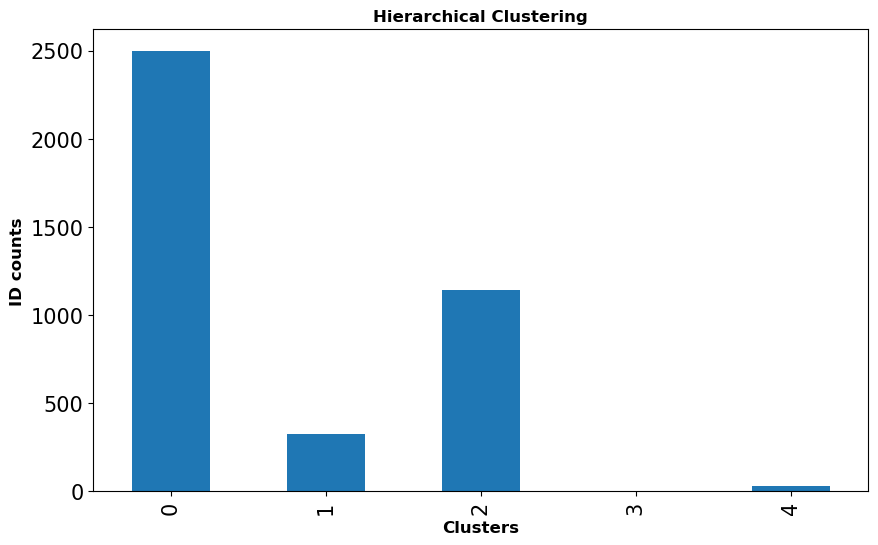

In [12]:
#creating barplot for the clusters 

fig, ax = plt.subplots(figsize=(10, 6))
Clustering_Q1_norm_clu.groupby(['clust_label']).count()['ID'].plot(kind='bar')
plt.ylabel('customers')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

In [13]:
Clustering_Q1_norm_clu.iloc[:,1:].groupby(Clustering_Q1_norm_clu.clust_label).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award,clust_label
clust_label,,,,,,,,,,,,
0,59968.433667,88.883768,1.712224,1.000401,1.011222,10271.530261,9.105812,227.797194,0.656112,3825.392786,0.000802,0.0
1,157084.578462,208.673846,4.661538,1.000000,1.061538,70477.086154,23.249231,1019.433846,3.196923,5770.572308,1.000000,1.0
2,80173.963287,248.550699,2.104895,1.009615,1.000874,16882.864510,13.412587,739.958916,2.236888,4304.383741,1.000000,2.0
3,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000,3.0
4,45515.064516,32.258065,1.000000,2.483871,1.000000,14618.870968,16.129032,443.225806,1.967742,3784.258065,0.193548,4.0


In [14]:
Cluster_1_norm=Clustering_Q1_norm_clu[(Clustering_Q1_norm_clu.clust_label==0)]
Cluster_1_norm.info(),'/n',Cluster_1_norm.mean(),'/n',Cluster_1_norm

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2495 entries, 0 to 3998
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 2495 non-null   int64
 1   Balance            2495 non-null   int64
 2   Qual_miles         2495 non-null   int64
 3   cc1_miles          2495 non-null   int64
 4   cc2_miles          2495 non-null   int64
 5   cc3_miles          2495 non-null   int64
 6   Bonus_miles        2495 non-null   int64
 7   Bonus_trans        2495 non-null   int64
 8   Flight_miles_12mo  2495 non-null   int64
 9   Flight_trans_12    2495 non-null   int64
 10  Days_since_enroll  2495 non-null   int64
 11  award              2495 non-null   int64
 12  clust_label        2495 non-null   int64
dtypes: int64(13)
memory usage: 272.9 KB


(None,
 '/n',
 ID                    2169.576353
 Balance              59968.433667
 Qual_miles              88.883768
 cc1_miles                1.712224
 cc2_miles                1.000401
 cc3_miles                1.011222
 Bonus_miles          10271.530261
 Bonus_trans              9.105812
 Flight_miles_12mo      227.797194
 Flight_trans_12          0.656112
 Days_since_enroll     3825.392786
 award                    0.000802
 clust_label              0.000000
 dtype: float64,
 '/n',
         ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
 0        1    28143           0          1          1          1          174   
 1        2    19244           0          1          1          1          215   
 2        3    41354           0          1          1          1         4123   
 3        4    14776           0          1          1          1          500   
 5        6    16420           0          1          1          1            0   
 ...    ...    

In [15]:
Cluster_2_norm=Clustering_Q1_norm_clu[(Clustering_Q1_norm_clu.clust_label==1)]
Cluster_2_norm.info(),'/n',Cluster_2_norm.mean(),'/n',Cluster_2_norm

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325 entries, 4 to 3883
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 325 non-null    int64
 1   Balance            325 non-null    int64
 2   Qual_miles         325 non-null    int64
 3   cc1_miles          325 non-null    int64
 4   cc2_miles          325 non-null    int64
 5   cc3_miles          325 non-null    int64
 6   Bonus_miles        325 non-null    int64
 7   Bonus_trans        325 non-null    int64
 8   Flight_miles_12mo  325 non-null    int64
 9   Flight_trans_12    325 non-null    int64
 10  Days_since_enroll  325 non-null    int64
 11  award              325 non-null    int64
 12  clust_label        325 non-null    int64
dtypes: int64(13)
memory usage: 35.5 KB


(None,
 '/n',
 ID                     1106.516923
 Balance              157084.578462
 Qual_miles              208.673846
 cc1_miles                 4.661538
 cc2_miles                 1.000000
 cc3_miles                 1.061538
 Bonus_miles           70477.086154
 Bonus_trans              23.249231
 Flight_miles_12mo      1019.433846
 Flight_trans_12           3.196923
 Days_since_enroll      5770.572308
 award                     1.000000
 clust_label               1.000000
 dtype: float64,
 '/n',
         ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
 4        5    97752           0          4          1          1        43300   
 11      12    96522           0          5          1          1        61105   
 15      16    28495           0          4          1          1        49442   
 16      17    51890           0          4          1          1        48963   
 20      21   120576           0          5          1          1        58831   
 .

In [16]:
Cluster_3_norm=Clustering_Q1_norm_clu[(Clustering_Q1_norm_clu.clust_label==2)]
Cluster_3_norm.info(),'/n',Cluster_3_norm.mean(),'/n',Cluster_3_norm

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1144 entries, 7 to 3996
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 1144 non-null   int64
 1   Balance            1144 non-null   int64
 2   Qual_miles         1144 non-null   int64
 3   cc1_miles          1144 non-null   int64
 4   cc2_miles          1144 non-null   int64
 5   cc3_miles          1144 non-null   int64
 6   Bonus_miles        1144 non-null   int64
 7   Bonus_trans        1144 non-null   int64
 8   Flight_miles_12mo  1144 non-null   int64
 9   Flight_trans_12    1144 non-null   int64
 10  Days_since_enroll  1144 non-null   int64
 11  award              1144 non-null   int64
 12  clust_label        1144 non-null   int64
dtypes: int64(13)
memory usage: 125.1 KB


(None,
 '/n',
 ID                    1923.643357
 Balance              80173.963287
 Qual_miles             248.550699
 cc1_miles                2.104895
 cc2_miles                1.009615
 cc3_miles                1.000874
 Bonus_miles          16882.864510
 Bonus_trans             13.412587
 Flight_miles_12mo      739.958916
 Flight_trans_12          2.236888
 Days_since_enroll     4304.383741
 award                    1.000000
 clust_label              2.000000
 dtype: float64,
 '/n',
         ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
 7        8    20856           0          1          1          1         5250   
 8        9   443003           0          3          2          1         1753   
 9       10   104860           0          3          1          1        28426   
 17      18    13958           0          1          1          1         4291   
 18      19    91473           0          3          1          1        27408   
 ...    ...    

In [17]:
Cluster_4_norm=Clustering_Q1_norm_clu[(Clustering_Q1_norm_clu.clust_label==3)]
Cluster_4_norm.info(),'/n',Cluster_4_norm.mean(),'/n',Cluster_4_norm

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 2015 to 3594
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 4 non-null      int64
 1   Balance            4 non-null      int64
 2   Qual_miles         4 non-null      int64
 3   cc1_miles          4 non-null      int64
 4   cc2_miles          4 non-null      int64
 5   cc3_miles          4 non-null      int64
 6   Bonus_miles        4 non-null      int64
 7   Bonus_trans        4 non-null      int64
 8   Flight_miles_12mo  4 non-null      int64
 9   Flight_trans_12    4 non-null      int64
 10  Days_since_enroll  4 non-null      int64
 11  award              4 non-null      int64
 12  clust_label        4 non-null      int64
dtypes: int64(13)
memory usage: 448.0 bytes


(None,
 '/n',
 ID                     3128.00
 Balance              131999.50
 Qual_miles              347.00
 cc1_miles                 2.50
 cc2_miles                 1.00
 cc3_miles                 1.00
 Bonus_miles           65634.25
 Bonus_trans              69.25
 Flight_miles_12mo     19960.00
 Flight_trans_12          49.25
 Days_since_enroll      2200.25
 award                     1.00
 clust_label               3.00
 dtype: float64,
 '/n',
         ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
 2015  2032    53232         888          4          1          1        80696   
 3235  3257   287033           0          1          1          1        26161   
 3583  3606   160114         500          1          1          1        71954   
 3594  3617    27619           0          4          1          1        83726   
 
       Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
 2015           65              22100               45   

# Hierarchial clustering of standardised data and ploting dendrograms

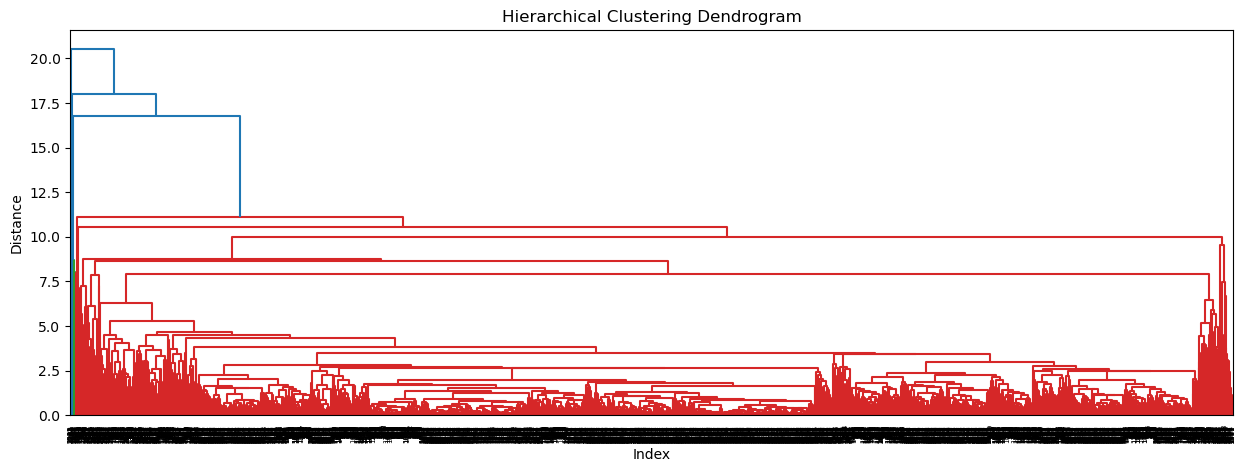

In [18]:
#clustering data using average euclidian distance method by scipy.cluster.hierarchy.linkage
import scipy.cluster.hierarchy as sch # for creating dendrogram 
z =sch. linkage(Clustering_Q1_stdsclr, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()     

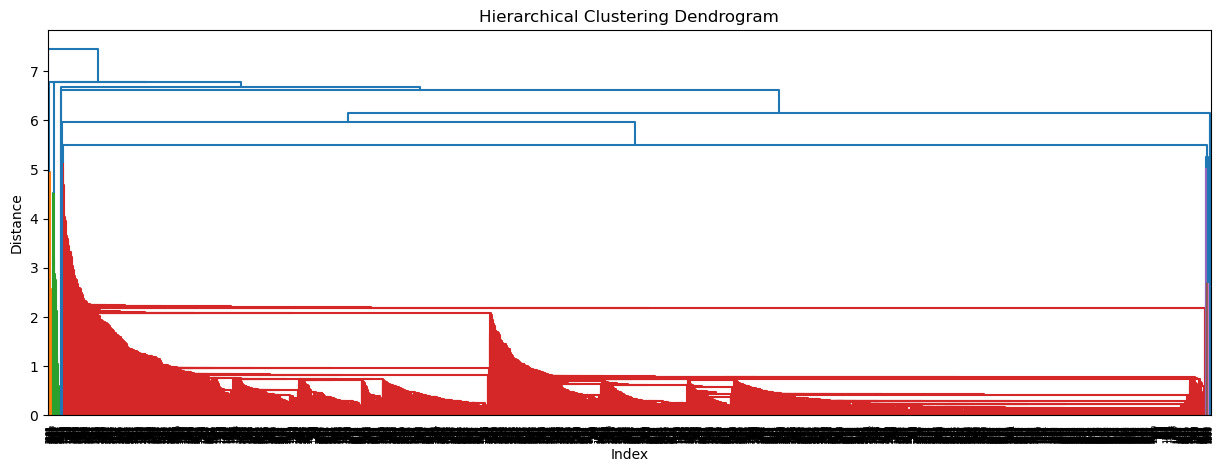

In [19]:
#clustering data using single linkage euclidian distance method by scipy.cluster.hierarchy.linkage
import scipy.cluster.hierarchy as sch # for creating dendrogram 
z =sch. linkage(Clustering_Q1_stdsclr, method="single",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()   

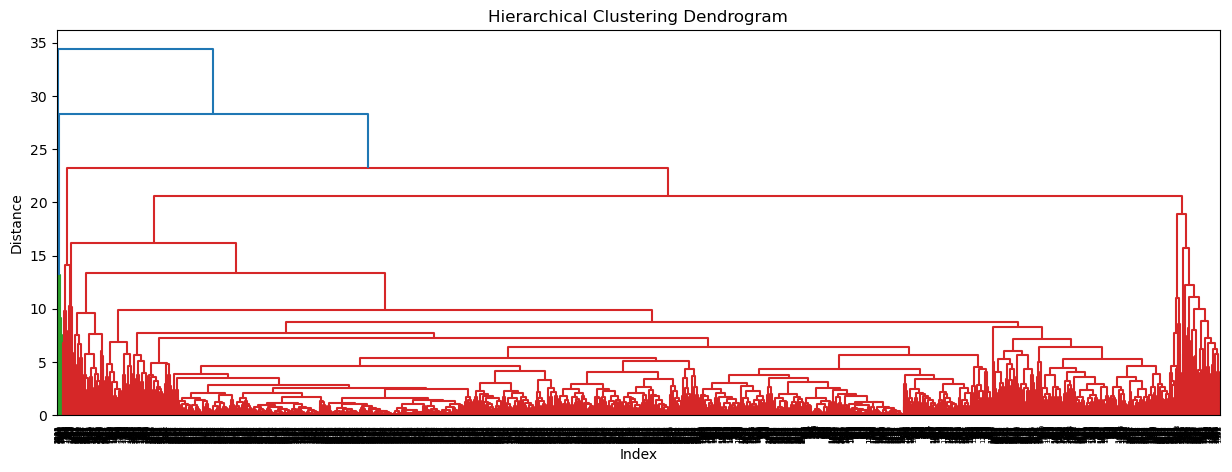

In [20]:
#clustering data using complete linkage euclidian distance method by scipy.cluster.hierarchy.linkage
import scipy.cluster.hierarchy as sch # for creating dendrogram 
z =sch. linkage(Clustering_Q1_stdsclr, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show() 

# creating cluster labels and adding cluster label column to DataFrame

In [53]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=2, linkage='average',affinity = "euclidean").fit(Clustering_Q1_stdsclr) 

cluster_labels=pd.Series(h_complete.labels_)
Clustering_Q1['clust_label']=cluster_labels # creating a  new column and assigning it to new column 
Clustering_Q1_std_clu=Clustering_Q1
Clustering_Q1_std_clu

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award,clust_label
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


# exploring clusters

In [22]:
Cluster_1_std=Clustering_Q1_std_clu[(Clustering_Q1_std_clu.clust_label==0)]
Cluster_1_std.info(),'/n',Cluster_1_std.mean(),'/n',Cluster_1_std

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3995 entries, 0 to 3998
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3995 non-null   int64
 1   Balance            3995 non-null   int64
 2   Qual_miles         3995 non-null   int64
 3   cc1_miles          3995 non-null   int64
 4   cc2_miles          3995 non-null   int64
 5   cc3_miles          3995 non-null   int64
 6   Bonus_miles        3995 non-null   int64
 7   Bonus_trans        3995 non-null   int64
 8   Flight_miles_12mo  3995 non-null   int64
 9   Flight_trans_12    3995 non-null   int64
 10  Days_since_enroll  3995 non-null   int64
 11  award              3995 non-null   int64
 12  clust_label        3995 non-null   int64
dtypes: int64(13)
memory usage: 437.0 KB


(None,
 '/n',
 ID                    2013.704881
 Balance              73542.856320
 Qual_miles             143.911389
 cc1_miles                2.059074
 cc2_miles                1.014518
 cc3_miles                1.012265
 Bonus_miles          17096.296120
 Bonus_trans             11.544180
 Flight_miles_12mo      440.531414
 Flight_trans_12          1.325657
 Days_since_enroll     4120.480100
 award                    0.369712
 clust_label              0.000000
 dtype: float64,
 '/n',
         ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
 0        1    28143           0          1          1          1          174   
 1        2    19244           0          1          1          1          215   
 2        3    41354           0          1          1          1         4123   
 3        4    14776           0          1          1          1          500   
 4        5    97752           0          4          1          1        43300   
 ...    ...    

In [23]:
Cluster_2_std=Clustering_Q1_std_clu[(Clustering_Q1_std_clu.clust_label==1)]
Cluster_2_std.info(),'/n',Cluster_2_std.mean(),'/n',Cluster_2_std

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 2015 to 3594
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 4 non-null      int64
 1   Balance            4 non-null      int64
 2   Qual_miles         4 non-null      int64
 3   cc1_miles          4 non-null      int64
 4   cc2_miles          4 non-null      int64
 5   cc3_miles          4 non-null      int64
 6   Bonus_miles        4 non-null      int64
 7   Bonus_trans        4 non-null      int64
 8   Flight_miles_12mo  4 non-null      int64
 9   Flight_trans_12    4 non-null      int64
 10  Days_since_enroll  4 non-null      int64
 11  award              4 non-null      int64
 12  clust_label        4 non-null      int64
dtypes: int64(13)
memory usage: 448.0 bytes


(None,
 '/n',
 ID                     3128.00
 Balance              131999.50
 Qual_miles              347.00
 cc1_miles                 2.50
 cc2_miles                 1.00
 cc3_miles                 1.00
 Bonus_miles           65634.25
 Bonus_trans              69.25
 Flight_miles_12mo     19960.00
 Flight_trans_12          49.25
 Days_since_enroll      2200.25
 award                     1.00
 clust_label               1.00
 dtype: float64,
 '/n',
         ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
 2015  2032    53232         888          4          1          1        80696   
 3235  3257   287033           0          1          1          1        26161   
 3583  3606   160114         500          1          1          1        71954   
 3594  3617    27619           0          4          1          1        83726   
 
       Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
 2015           65              22100               45   

# K-Means clustering

In [26]:
#Importing K-Means from sklearn for clustering
from sklearn.cluster import KMeans

In [118]:
# Import .xslx file and convert it to a DataFrame object
#renaming the columns
KMeans_Clustering_Q1= pd.read_excel("EastWestAirlines.xlsx",sheet_name="data")
KMeans_Clustering_Q1=KMeans_Clustering_Q1.rename(columns={'ID#':'ID','Award?':'award'})
KMeans_Clustering_Q1

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [117]:
#Normalising dataframe
KMeans_Clustering_Q1 = trans.fit_transform(KMeans_Clustering_Q1)
KMeans_Clustering_Q1   

array([[0.00000000e+00, 1.65077268e-02, 0.00000000e+00, ...,
        0.00000000e+00, 8.43742464e-01, 0.00000000e+00],
       [2.48756219e-04, 1.12878760e-02, 0.00000000e+00, ...,
        0.00000000e+00, 8.39884254e-01, 0.00000000e+00],
       [4.97512438e-04, 2.42568502e-02, 0.00000000e+00, ...,
        0.00000000e+00, 8.47841813e-01, 0.00000000e+00],
       ...,
       [9.99502488e-01, 4.31694976e-02, 0.00000000e+00, ...,
        0.00000000e+00, 1.68796721e-01, 1.00000000e+00],
       [9.99751244e-01, 3.22018866e-02, 0.00000000e+00, ...,
        1.88679245e-02, 1.68676151e-01, 0.00000000e+00],
       [1.00000000e+00, 1.76908304e-03, 0.00000000e+00, ...,
        0.00000000e+00, 1.68314444e-01, 0.00000000e+00]])

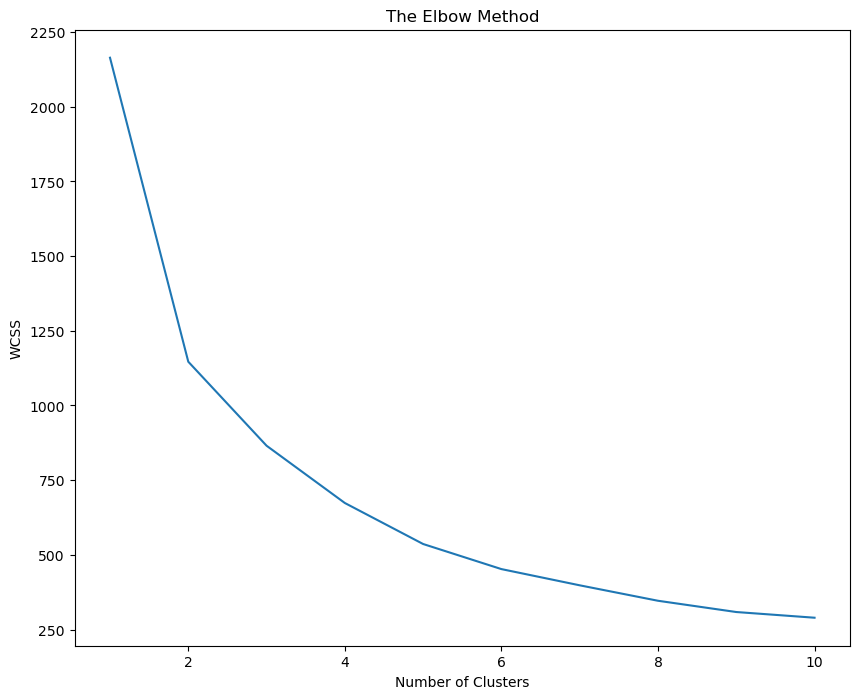

In [110]:
#analysing Elbow Plot for optimal number of clusters
fig = plt.figure(figsize=(10, 8))
WCSS = []    
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(KMeans_Clustering_Q1)
    WCSS.append(clf.inertia_) # inertia another name for wcss
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()  

In [111]:
#from above curve we can say that,dividing data into 6 clusters is a feasble option.

In [112]:
clf = KMeans(n_clusters=6)
y_Kmeans = clf.fit_predict(KMeans_Clustering_Q1)

In [121]:
KMeans_Clustering_Q1= pd.read_excel("EastWestAirlines.xlsx",sheet_name="data")
KMeans_Clustering_Q1=KMeans_Clustering_Q1.rename(columns={'ID#':'ID','Award?':'award'})
KMeans_Clustering_Q1

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [122]:
md = pd.Series(y_Kmeans)
KMeans_Clustering_Q1['clust'] = md
KMeans_Clustering_Q1

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,5


In [120]:
KMeans_Clustering_Q1= pd.read_excel("EastWestAirlines.xlsx",sheet_name="data")
KMeans_Clustering_Q1=KMeans_Clustering_Q1.rename(columns={'ID#':'ID','Award?':'award'})
KMeans_Clustering_Q1

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [123]:
KMeans_Clustering_Q1.groupby(KMeans_Clustering_Q1.clust).mean()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award
clust,,,,,,,,,,,,
0,1169.978009,49674.980324,90.319444,1.118056,1.017361,1.001157,3386.160880,6.824074,242.075231,0.719907,5570.855324,0.0
1,1247.655280,122626.877329,209.512422,4.082298,1.001553,1.032609,50459.795031,20.773292,777.492236,2.326087,5481.400621,1.0
2,2984.503171,59882.192389,208.600423,1.896406,1.025370,1.000000,15026.454545,13.023256,833.000000,2.505285,2510.171247,1.0
3,1016.656593,100108.744505,335.541209,1.142857,1.027473,1.016484,8805.763736,10.538462,1030.892857,3.206044,5858.197802,1.0
4,1628.158379,125899.655617,68.941068,3.664825,1.001842,1.025783,33035.488029,17.337017,225.740331,0.655617,4793.812155,0.0
5,3219.702070,35385.638164,94.610261,1.204320,1.017102,1.006301,4400.907291,6.941494,214.288029,0.598560,1983.927093,0.0


Text(0.5, 1.0, 'Clusters using kmeans')

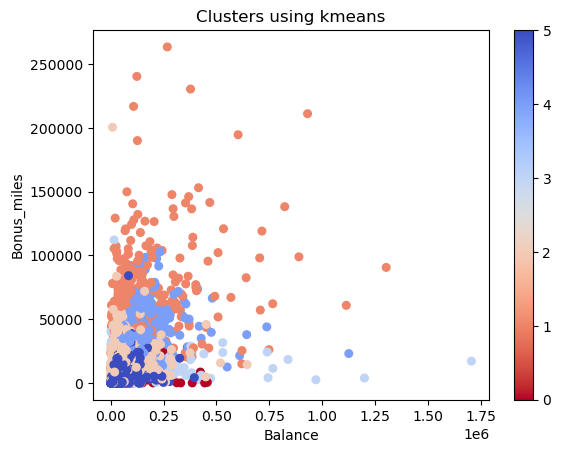

In [141]:
KMeans_Clustering_Q1.plot(x="Balance",y = "Bonus_miles",c=clf.labels_,kind = "scatter",s = 30,cmap=plt.cm.coolwarm_r)
plt.title('Clusters using kmeans')

In [125]:
WCSS

[2164.1265977774983,
 1146.459517093534,
 865.2605940455041,
 673.471379921567,
 536.2034790432668,
 452.2284305074122,
 397.9445893438377,
 346.22809063690846,
 308.5169582079873,
 289.44762663937956]

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5')])

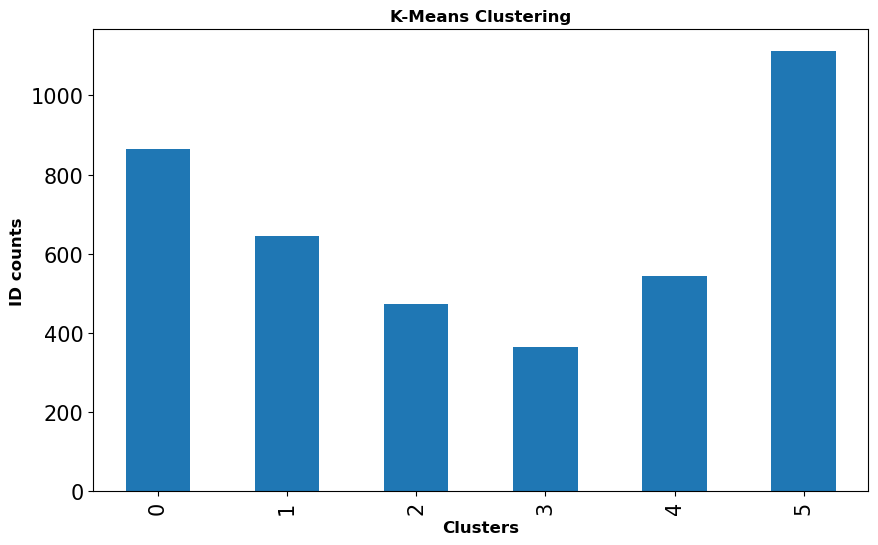

In [143]:
#creating barplot for the clusters 

fig, ax = plt.subplots(figsize=(10, 6))
KMeans_Clustering_Q1.groupby(['clust']).count()['ID'].plot(kind='bar')
plt.ylabel('customers')
plt.title('K-Means Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

In [147]:
KMeans_Clustering_Q1_1=KMeans_Clustering_Q1[(KMeans_Clustering_Q1.clust==0)]
KMeans_Clustering_Q1_1.info(),'/n',KMeans_Clustering_Q1_1.mean(),'/n',KMeans_Clustering_Q1_1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 864 entries, 0 to 2208
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 864 non-null    int64
 1   Balance            864 non-null    int64
 2   Qual_miles         864 non-null    int64
 3   cc1_miles          864 non-null    int64
 4   cc2_miles          864 non-null    int64
 5   cc3_miles          864 non-null    int64
 6   Bonus_miles        864 non-null    int64
 7   Bonus_trans        864 non-null    int64
 8   Flight_miles_12mo  864 non-null    int64
 9   Flight_trans_12    864 non-null    int64
 10  Days_since_enroll  864 non-null    int64
 11  award              864 non-null    int64
 12  clust              864 non-null    int32
dtypes: int32(1), int64(12)
memory usage: 91.1 KB


(None,
 '/n',
 ID                    1169.978009
 Balance              49674.980324
 Qual_miles              90.319444
 cc1_miles                1.118056
 cc2_miles                1.017361
 cc3_miles                1.001157
 Bonus_miles           3386.160880
 Bonus_trans              6.824074
 Flight_miles_12mo      242.075231
 Flight_trans_12          0.719907
 Days_since_enroll     5570.855324
 award                    0.000000
 clust                    0.000000
 dtype: float64,
 '/n',
         ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
 0        1    28143           0          1          1          1          174   
 1        2    19244           0          1          1          1          215   
 2        3    41354           0          1          1          1         4123   
 3        4    14776           0          1          1          1          500   
 5        6    16420           0          1          1          1            0   
 ...    ...    

In [148]:
KMeans_Clustering_Q1_2=KMeans_Clustering_Q1[(KMeans_Clustering_Q1.clust==1)]
KMeans_Clustering_Q1_2.info(),'/n',KMeans_Clustering_Q1_2.mean(),'/n',KMeans_Clustering_Q1_2

<class 'pandas.core.frame.DataFrame'>
Int64Index: 644 entries, 4 to 3883
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 644 non-null    int64
 1   Balance            644 non-null    int64
 2   Qual_miles         644 non-null    int64
 3   cc1_miles          644 non-null    int64
 4   cc2_miles          644 non-null    int64
 5   cc3_miles          644 non-null    int64
 6   Bonus_miles        644 non-null    int64
 7   Bonus_trans        644 non-null    int64
 8   Flight_miles_12mo  644 non-null    int64
 9   Flight_trans_12    644 non-null    int64
 10  Days_since_enroll  644 non-null    int64
 11  award              644 non-null    int64
 12  clust              644 non-null    int32
dtypes: int32(1), int64(12)
memory usage: 67.9 KB


(None,
 '/n',
 ID                     1247.655280
 Balance              122626.877329
 Qual_miles              209.512422
 cc1_miles                 4.082298
 cc2_miles                 1.001553
 cc3_miles                 1.032609
 Bonus_miles           50459.795031
 Bonus_trans              20.773292
 Flight_miles_12mo       777.492236
 Flight_trans_12           2.326087
 Days_since_enroll      5481.400621
 award                     1.000000
 clust                     1.000000
 dtype: float64,
 '/n',
         ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
 4        5    97752           0          4          1          1        43300   
 8        9   443003           0          3          2          1         1753   
 9       10   104860           0          3          1          1        28426   
 11      12    96522           0          5          1          1        61105   
 15      16    28495           0          4          1          1        49442   
 .

In [149]:
KMeans_Clustering_Q1_3=KMeans_Clustering_Q1[(KMeans_Clustering_Q1.clust==2)]
KMeans_Clustering_Q1_3.info(),'/n',KMeans_Clustering_Q1_3.mean(),'/n',KMeans_Clustering_Q1_3

<class 'pandas.core.frame.DataFrame'>
Int64Index: 473 entries, 1905 to 3996
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 473 non-null    int64
 1   Balance            473 non-null    int64
 2   Qual_miles         473 non-null    int64
 3   cc1_miles          473 non-null    int64
 4   cc2_miles          473 non-null    int64
 5   cc3_miles          473 non-null    int64
 6   Bonus_miles        473 non-null    int64
 7   Bonus_trans        473 non-null    int64
 8   Flight_miles_12mo  473 non-null    int64
 9   Flight_trans_12    473 non-null    int64
 10  Days_since_enroll  473 non-null    int64
 11  award              473 non-null    int64
 12  clust              473 non-null    int32
dtypes: int32(1), int64(12)
memory usage: 49.9 KB


(None,
 '/n',
 ID                    2984.503171
 Balance              59882.192389
 Qual_miles             208.600423
 cc1_miles                1.896406
 cc2_miles                1.025370
 cc3_miles                1.000000
 Bonus_miles          15026.454545
 Bonus_trans             13.023256
 Flight_miles_12mo      833.000000
 Flight_trans_12          2.505285
 Days_since_enroll     2510.171247
 award                    1.000000
 clust                    2.000000
 dtype: float64,
 '/n',
         ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
 1905  1922    10679           0          2          1          1        13363   
 1951  1968    55064           0          2          1          1         8041   
 2043  2060      434           0          1          1          1        15530   
 2068  2085    75892           0          2          1          1         8738   
 2080  2097    30040           0          2          1          1         8636   
 ...    ...    

In [150]:
KMeans_Clustering_Q1_4=KMeans_Clustering_Q1[(KMeans_Clustering_Q1.clust==3)]
KMeans_Clustering_Q1_4.info(),'/n',KMeans_Clustering_Q1_4.mean(),'/n',KMeans_Clustering_Q1_4

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364 entries, 7 to 2161
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 364 non-null    int64
 1   Balance            364 non-null    int64
 2   Qual_miles         364 non-null    int64
 3   cc1_miles          364 non-null    int64
 4   cc2_miles          364 non-null    int64
 5   cc3_miles          364 non-null    int64
 6   Bonus_miles        364 non-null    int64
 7   Bonus_trans        364 non-null    int64
 8   Flight_miles_12mo  364 non-null    int64
 9   Flight_trans_12    364 non-null    int64
 10  Days_since_enroll  364 non-null    int64
 11  award              364 non-null    int64
 12  clust              364 non-null    int32
dtypes: int32(1), int64(12)
memory usage: 38.4 KB


(None,
 '/n',
 ID                     1016.656593
 Balance              100108.744505
 Qual_miles              335.541209
 cc1_miles                 1.142857
 cc2_miles                 1.027473
 cc3_miles                 1.016484
 Bonus_miles            8805.763736
 Bonus_trans              10.538462
 Flight_miles_12mo      1030.892857
 Flight_trans_12           3.206044
 Days_since_enroll      5858.197802
 award                     1.000000
 clust                     3.000000
 dtype: float64,
 '/n',
         ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
 7        8    20856           0          1          1          1         5250   
 17      18    13958           0          1          1          1         4291   
 21      22   185681        2024          1          1          1        13300   
 29      30    19221           0          1          1          1         4655   
 36      37    23193           0          1          1          1          650   
 .

In [151]:
KMeans_Clustering_Q1_5=KMeans_Clustering_Q1[(KMeans_Clustering_Q1.clust==4)]
KMeans_Clustering_Q1_5.info(),'/n',KMeans_Clustering_Q1_5.mean(),'/n',KMeans_Clustering_Q1_5

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543 entries, 6 to 3985
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 543 non-null    int64
 1   Balance            543 non-null    int64
 2   Qual_miles         543 non-null    int64
 3   cc1_miles          543 non-null    int64
 4   cc2_miles          543 non-null    int64
 5   cc3_miles          543 non-null    int64
 6   Bonus_miles        543 non-null    int64
 7   Bonus_trans        543 non-null    int64
 8   Flight_miles_12mo  543 non-null    int64
 9   Flight_trans_12    543 non-null    int64
 10  Days_since_enroll  543 non-null    int64
 11  award              543 non-null    int64
 12  clust              543 non-null    int32
dtypes: int32(1), int64(12)
memory usage: 57.3 KB


(None,
 '/n',
 ID                     1628.158379
 Balance              125899.655617
 Qual_miles               68.941068
 cc1_miles                 3.664825
 cc2_miles                 1.001842
 cc3_miles                 1.025783
 Bonus_miles           33035.488029
 Bonus_trans              17.337017
 Flight_miles_12mo       225.740331
 Flight_trans_12           0.655617
 Days_since_enroll      4793.812155
 award                     0.000000
 clust                     4.000000
 dtype: float64,
 '/n',
         ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
 6        7    84914           0          3          1          1        27482   
 30      31   177926           0          3          1          1        20797   
 32      33   276571           0          4          1          1        42044   
 44      45   121260           0          3          1          1        18493   
 56      57    75971           0          4          1          1        34339   
 .

In [152]:
KMeans_Clustering_Q1_6=KMeans_Clustering_Q1[(KMeans_Clustering_Q1.clust==5)]
KMeans_Clustering_Q1_6.info(),'/n',KMeans_Clustering_Q1_6.mean(),'/n',KMeans_Clustering_Q1_6

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1111 entries, 1950 to 3998
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 1111 non-null   int64
 1   Balance            1111 non-null   int64
 2   Qual_miles         1111 non-null   int64
 3   cc1_miles          1111 non-null   int64
 4   cc2_miles          1111 non-null   int64
 5   cc3_miles          1111 non-null   int64
 6   Bonus_miles        1111 non-null   int64
 7   Bonus_trans        1111 non-null   int64
 8   Flight_miles_12mo  1111 non-null   int64
 9   Flight_trans_12    1111 non-null   int64
 10  Days_since_enroll  1111 non-null   int64
 11  award              1111 non-null   int64
 12  clust              1111 non-null   int32
dtypes: int32(1), int64(12)
memory usage: 117.2 KB


(None,
 '/n',
 ID                    3219.702070
 Balance              35385.638164
 Qual_miles              94.610261
 cc1_miles                1.204320
 cc2_miles                1.017102
 cc3_miles                1.006301
 Bonus_miles           4400.907291
 Bonus_trans              6.941494
 Flight_miles_12mo      214.288029
 Flight_trans_12          0.598560
 Days_since_enroll     1983.927093
 award                    0.000000
 clust                    5.000000
 dtype: float64,
 '/n',
         ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
 1950  1967    15676           0          1          1          1            0   
 1952  1969    40675           0          1          1          1         1413   
 2041  2058    15148           0          1          1          1        15148   
 2067  2084    89708           0          1          1          1         8000   
 2102  2119    59913           0          1          1          1         2210   
 ...    ...    

# DBSCAN 

In [132]:
#Importing DBSCAN from sklearn
from sklearn.cluster import DBSCAN


In [126]:
# Import .xslx file and convert it to a DataFrame object
#renaming the columns
DBSCAN_Clustering_Q1= pd.read_excel("EastWestAirlines.xlsx",sheet_name="data")
DBSCAN_Clustering_Q1=DBSCAN_Clustering_Q1.rename(columns={'ID#':'ID','Award?':'award'})
DBSCAN_Clustering_Q1

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [127]:
array = DBSCAN_Clustering_Q1.values
array

array([[    1, 28143,     0, ...,     0,  7000,     0],
       [    2, 19244,     0, ...,     0,  6968,     0],
       [    3, 41354,     0, ...,     0,  7034,     0],
       ...,
       [ 4019, 73597,     0, ...,     0,  1402,     1],
       [ 4020, 54899,     0, ...,     1,  1401,     0],
       [ 4021,  3016,     0, ...,     0,  1398,     0]], dtype=int64)

In [128]:
stscalar = StandardScaler().fit(array)
stscalar = stscalar.transform(array)
stscalar

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [133]:
DBSCA = DBSCAN(eps = 0.475,min_samples=5)
DBSCAN.fit(stscalar)

DBSCAN(eps=0.475)

In [135]:
cluster_labels=pd.Series(DBSCAN.labels_)
DBSCAN_Clustering_Q1['clust_label']=cluster_labels # creating a  new column and assigning it to new column 
DBSCAN_Clustering_Q1=DBSCAN_Clustering_Q1
DBSCAN_Clustering_Q1

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award,clust_label
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,4
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,-1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,-1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


Text(0.5, 1.0, 'Clusters using DBScan')

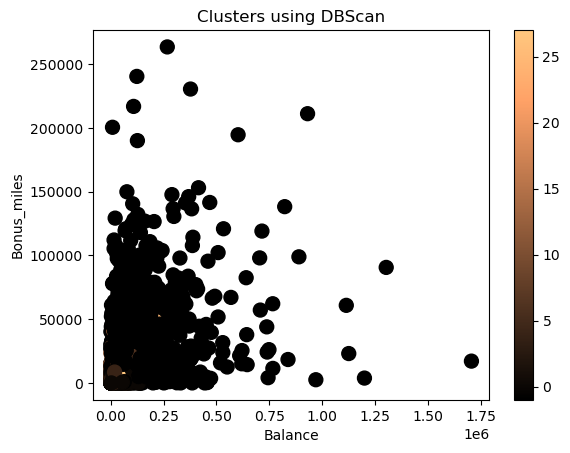

In [138]:
import matplotlib.pyplot as plt 
DBSCAN_Clustering_Q1.plot(x="Balance",y ="Bonus_miles",c=DBSCAN.labels_ ,kind="scatter",s=100 ,cmap=plt.cm.copper) 
plt.title('Clusters using DBScan')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 [Text(0, 0, '-1'),
  Text(1, 0, '0'),
  Text(2, 0, '1'),
  Text(3, 0, '2'),
  Text(4, 0, '3'),
  Text(5, 0, '4'),
  Text(6, 0, '5'),
  Text(7, 0, '6'),
  Text(8, 0, '7'),
  Text(9, 0, '8'),
  Text(10, 0, '9'),
  Text(11, 0, '10'),
  Text(12, 0, '11'),
  Text(13, 0, '12'),
  Text(14, 0, '13'),
  Text(15, 0, '14'),
  Text(16, 0, '15'),
  Text(17, 0, '16'),
  Text(18, 0, '17'),
  Text(19, 0, '18'),
  Text(20, 0, '19'),
  Text(21, 0, '20'),
  Text(22, 0, '21'),
  Text(23, 0, '22'),
  Text(24, 0, '23'),
  Text(25, 0, '24'),
  Text(26, 0, '25'),
  Text(27, 0, '26'),
  Text(28, 0, '27')])

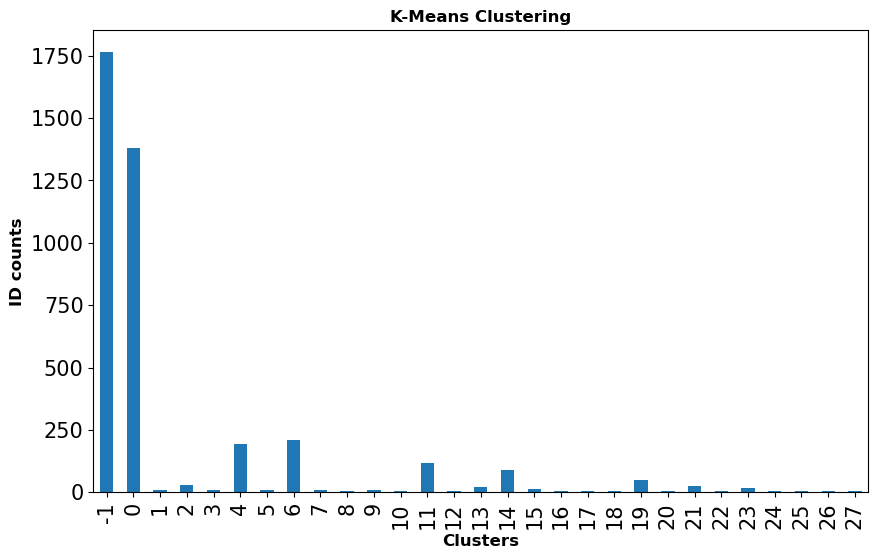

In [145]:
#creating barplot for the clusters 

fig, ax = plt.subplots(figsize=(10, 6))
DBSCAN_Clustering_Q1.groupby(['clust_label']).count()['ID'].plot(kind='bar')
plt.ylabel('customers')
plt.title('K-Means Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

In [ ]:
#Since DBSCAN model giving too many clusters,it is not effective model here.